In [1]:
!pip install opencv-python
!pip install opencv-rolling-ball
!pip install sewar


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from skimage import io, filters, feature, measure, metrics
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import os
from cv2_rolling_ball import subtract_background_rolling_ball
from sewar import full_ref
from skimage.metrics import structural_similarity as ssim

#Edge detection
from skimage.filters import roberts, sobel, scharr, prewitt, farid, threshold_multiotsu
from scipy import ndimage as nd
from skimage.filters.rank import entropy
from skimage.morphology import disk
import glob
import shutil
from skimage import io
from IPython.core.debugger import Pdb

In [3]:
# Function to extract frames from a video until reaching the desired frame count
def extract_frames(video_file):
    cap = cv2.VideoCapture(video_file)
    
    frame_rate = 5  # Desired frame rate (1 frame every 0.33 seconds)
    frame_count = 0
    file_no = 0
    
    # Get the video file's name without extension
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    
    # Create an output folder with a name corresponding to the video
    output_directory = f"D:\Volvo\Images\{video_name}"
    os.makedirs(output_directory, exist_ok=True)
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        frame_count += 1
        
        # Only extract frames at the desired frame rate
        if frame_count % int(cap.get(5) / frame_rate) == 0:
            file_no += 1
            output_file = f"{output_directory}/{file_no}.jpg"
            cv2.imwrite(output_file, frame)
            print(f"Frame {frame_count} has been extracted and saved as {output_file}")
    
    cap.release()
    cv2.destroyAllWindows()
    
    shutil.move(f"D:\Volvo\Videos\{video_name}.mp4", f"D:\Volvo\Processed Videos\{video_name}.mp4")

In [4]:
#if __name__ == "__main__":
path = "D:\Volvo\Videos\*.*"

for video_file in glob.glob(path):
   #video_file = r"D:\Volvo\Videos\WIN_20240307_14_59_52_Pro.mp4"  # Replace with your video's name
    extract_frames(video_file)

-0.47607341408729553 0.8553835153579712 (867, 646) (743, 544)
-0.4801628589630127 0.9991878271102905 (1477, 553) (1119, 546)


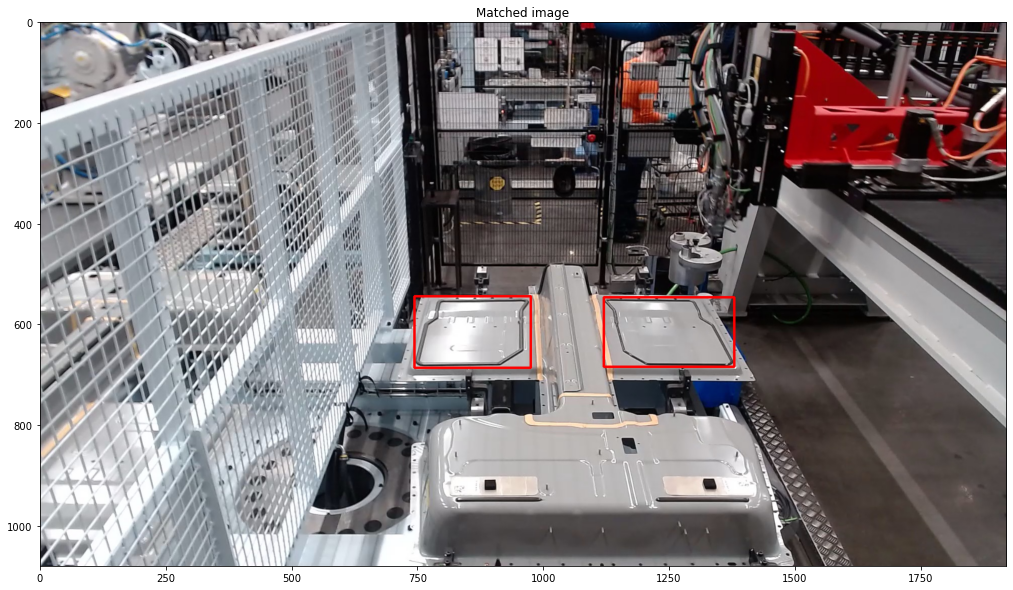

In [5]:
img_gray = cv2.imread('D:\\Volvo\Images\\WIN_20240307_14_59_52_Pro\\631.jpg', 0)
img_color = cv2.imread('D:\\Volvo\\Images\\WIN_20240307_14_59_52_Pro\\631.jpg', 1)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_templateLeft = cv2.imread('D:\\Volvo\\Images\\TempLeft.jpg', 0)
img_templateRight = cv2.imread('D:\\Volvo\\Images\\TempRight.jpg', 0)

h, w = img_templateLeft.shape[::]

res = cv2.matchTemplate(img_gray, img_templateLeft, cv2.TM_CCOEFF_NORMED)
#plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

if loc != 0 :
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc)
    top_left = max_loc  #Change to max_loc for all except for TM_CCOEFF_NORMED
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 3)
else :
    print("Nothing detected")
  

h, w = img_templateRight.shape[::]
    
res = cv2.matchTemplate(img_gray, img_templateRight, cv2.TM_CCOEFF_NORMED)
#plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

if loc != 0 :
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc)
    top_left = max_loc  #Change to max_loc for all except for TM_CCOEFF_NORMED
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 3)
else :
    print("Nothing detected")

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc. 

#for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
#    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
#    cv2.rectangle(img_rgb, pt, (loc[0] + w, loc[1] + h), (255, 0, 0), 1)  #Red rectangles with thickness 2. 

#cv2.imwrite('images/template_matched.jpg', img_rgb)
#cv2.imshow("Matched image", img_rgb)
#cv2.waitKey()
#cv2.destroyAllWindows()

plt.figure(figsize = (20, 10))
plt.imshow(img_rgb)
plt.title('Matched image')
plt.show()

In [6]:
def get_templateLoc(orig_img_file, temp_img_file):
    orig_img_gray = cv2.imread(orig_img_file, 0)
    orig_img_color = cv2.imread(orig_img_file, 1)
    orig_img_rgb = cv2.cvtColor(orig_img_color, cv2.COLOR_BGR2RGB)
    temp_img = cv2.imread(temp_img_file, 0)
    
    h, w = temp_img.shape[::]
    
    res = cv2.matchTemplate(orig_img_gray, temp_img, cv2.TM_CCOEFF_NORMED)
    threshold = 0.95 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

    loc = np.where( res >= threshold)  
    #Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if max_val >= threshold:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        print(min_val, max_val, min_loc, max_loc, orig_img_file, temp_img_file)
        
        # Writing a string to file
        file1.write(str(min_val) + ' ' + str(max_val) + ' ' + str(min_loc) + ' ' + str(max_loc) + ' ' + orig_img_file + ' ' + temp_img_file + ' ' + '\n')
        
        #top_left = max_loc  #Change to max_loc for all except for TM_CCOEFF_NORMED
        #bottom_right = (top_left[0] + w, top_left[1] + h)
        #cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 3)
    else :
        print("Nothing detected", orig_img_file, temp_img_file, max_val)
        file1.write("Nothing detected" + ' ' + orig_img_file + ' ' + temp_img_file + ' ' + str(max_val) + ' ' + '\n')        

In [7]:

image_files = glob.glob("D:\Volvo\Images\*\*.*")
image_files.sort(key=os.path.getmtime)

# Opening a file
file1 = open('D:\\Volvo\\TemplatePosRight.txt', 'w')

for image_file in image_files:
    get_templateLoc(image_file, 'D:\\Volvo\\Images\\TempRight.jpg')
    
# Closing file
file1.close()

'""\nimage_files = glob.glob("D:\\Volvo\\Images\\*\\*.*")\nimage_files.sort(key=os.path.getmtime)\n\n# Opening a file\nfile1 = open(\'D:\\Volvo\\TemplatePosRight.txt\', \'w\')\n\nfor image_file in image_files:\n    get_templateLoc(image_file, \'D:\\Volvo\\Images\\TempRight.jpg\')\n    \n# Closing file\nfile1.close()\n'

In [88]:
def get_LeftBatteryLid(orig_img_file, temp_img_file, temp_img_file_right):
    global cropped_file_no, finished_left, best_left_match_file, curr_max_value, battery_lid_file_no, best_right_match_file, curr_max_value_right, threshold
    
    orig_img_gray = cv2.imread(orig_img_file, 0)
    orig_img_color = cv2.imread(orig_img_file, 1)
    orig_img_rgb = cv2.cvtColor(orig_img_color, cv2.COLOR_BGR2RGB)
    temp_img = cv2.imread(temp_img_file, 0)
    
    h, w = temp_img.shape[::]
        
    sealing_top = h - 30
    sealing_left = 20
    sealing_bottom = h - 2
            
    res = cv2.matchTemplate(orig_img_gray, temp_img, cv2.TM_CCOEFF_NORMED)
    
    if finished_left == 0:
        threshold = 0.95 #Pick only values above 0.95. For TM_CCOEFF_NORMED, larger values = good fit.
    
        
    #loc = np.where(res >= threshold)  
    #Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if max_val >= threshold:
        #min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        threshold = max_val * 0.96
        print(min_val, max_val, min_loc, max_loc, orig_img_file, temp_img_file, threshold)
        
        top_left = max_loc  #Change to max_loc for all except for TM_CCOEFF_NORMED        
        cropped_img = orig_img_rgb[top_left[1]:top_left[1] + h, top_left[0]:top_left[0] + w]
        last_directory = os.path.basename(os.path.dirname(orig_img_file))
        img_file_name = os.path.splitext(os.path.basename(orig_img_file))[0]
        cropped_file_no += 1
        
        #print(top_left[1],top_left[1] + h, top_left[0],top_left[0] + w)
        #print((top_left[1] + sealing_top),(top_left[1] + h), (top_left[0] + sealing_left),(top_left[0] + w))
        
        cropped_img_file = f"D:/Volvo/BatteryLid Images/{last_directory}_{img_file_name}_{cropped_file_no:06d}.jpg"
        cv2.imwrite(cropped_img_file, cropped_img)
        
        cropped_img_sealing = orig_img_rgb[(top_left[1] + sealing_top):(top_left[1] + sealing_bottom), (top_left[0] + sealing_left):(top_left[0] + w)]
        cropped_img_sealing_file = f"D:/Volvo/BatteryLid Images Sealing/{last_directory}_{img_file_name}_{cropped_file_no:06d}.jpg"
        cv2.imwrite(cropped_img_sealing_file, cropped_img_sealing)
        
        if finished_left == 0:
            finished_left = 1
            best_right_match_file = ''
            curr_max_value_right = 0
        
        if max_val > curr_max_value:
            curr_max_value = max_val
            best_left_match_file = orig_img_file
            print(best_left_match_file)
    else :
        print("Nothing detected", orig_img_file, temp_img_file, max_val, threshold)
        
    if finished_left == 1:
        temp_img_right = cv2.imread(temp_img_file_right, 0)
    
        h_right, w_right = temp_img_right.shape[::]
            
        res_right = cv2.matchTemplate(orig_img_gray, temp_img_right, cv2.TM_CCOEFF_NORMED)
        
        threshold_right = 0.90 #Pick only values above 0.90. For TM_CCOEFF_NORMED, larger values = good fit.
    
        #loc_right = np.where(res_right >= threshold_right)  
        #Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.
    
        min_val_right, max_val_right, min_loc_right, max_loc_right = cv2.minMaxLoc(res_right)
        
        if max_val_right >= threshold_right:
            print(min_val_right, max_val_right, min_loc_right, max_loc_right, orig_img_file, temp_img_file_right)
            
            cropped_img = orig_img_rgb[top_left[1]:top_left[1] + h, top_left[0]:top_left[0] + w]
            last_directory = os.path.basename(os.path.dirname(orig_img_file))
            img_file_name = os.path.splitext(os.path.basename(orig_img_file))[0]
            cropped_file_no += 1
            cropped_img_file = f"D:/Volvo/BatteryLid Images/{last_directory}_{img_file_name}_{cropped_file_no:06d}.jpg"
            cv2.imwrite(cropped_img_file, cropped_img)           
            
            
            cropped_img_sealing = orig_img_rgb[(top_left[1] + sealing_top):(top_left[1] + sealing_bottom), (top_left[0] + sealing_left):(top_left[0] + w)]
            cropped_img_sealing_file = f"D:/Volvo/BatteryLid Images Sealing/{last_directory}_{img_file_name}_{cropped_file_no:06d}.jpg"
            cv2.imwrite(cropped_img_sealing_file, cropped_img_sealing)
            
            
            if max_val_right > curr_max_value_right:
                curr_max_value_right = max_val_right
                best_right_match_file = orig_img_file
                
        if (best_right_match_file != '' and max_val < threshold):
            
            battery_lid_file_no += 1
            
            print(best_left_match_file, best_right_match_file)
            
            orig_img_first_color = cv2.imread(best_left_match_file, 1)
            orig_img_first_rgb = cv2.cvtColor(orig_img_first_color, cv2.COLOR_BGR2RGB)
            orig_img_first_gray = cv2.imread(best_left_match_file, 0)
            
            res = cv2.matchTemplate(orig_img_first_gray, temp_img, cv2.TM_CCOEFF_NORMED)    
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)           
            top_left = max_loc  #Change to max_loc for all except for TM_CCOEF
            
            cropped_img_first = orig_img_first_rgb[top_left[1]:top_left[1] + h, top_left[0]:top_left[0] + w]         
            cropped_img_file_first = f"D:/Volvo/BatteryLid Images Cycle/BatteryLid{battery_lid_file_no:06d}_0.jpg"
            cv2.imwrite(cropped_img_file_first, cropped_img_first)            
            
            cropped_img_sealing_first = orig_img_first_rgb[(top_left[1] + sealing_top):(top_left[1] + sealing_bottom), (top_left[0] + sealing_left):(top_left[0] + w)]
            cropped_img_sealing_first_file = f"D:/Volvo/BatteryLid Images Sealing Cycle/BatteryLid{battery_lid_file_no:06d}_0.jpg"
            cv2.imwrite(cropped_img_sealing_first_file, cropped_img_sealing_first)
            
            orig_img_second_color = cv2.imread(best_right_match_file, 1)
            orig_img_second_rgb = cv2.cvtColor(orig_img_second_color, cv2.COLOR_BGR2RGB)
            cropped_img_second = orig_img_second_rgb[top_left[1]:top_left[1] + h, top_left[0]:top_left[0] + w]         
            
            cropped_img_file_second = f"D:/Volvo/BatteryLid Images Cycle/BatteryLid{battery_lid_file_no:06d}_1.jpg"
            cv2.imwrite(cropped_img_file_second, cropped_img_second)
            
            cropped_img_sealing_second = orig_img_second_rgb[(top_left[1] + sealing_top):(top_left[1] + sealing_bottom), (top_left[0] + sealing_left):(top_left[0] + w)]
            cropped_img_sealing_second_file = f"D:/Volvo/BatteryLid Images Sealing Cycle/BatteryLid{battery_lid_file_no:06d}_1.jpg"
            cv2.imwrite(cropped_img_sealing_second_file, cropped_img_sealing_second)
                        
            finished_left = 0
            best_left_match_file = ''
            curr_max_value = 0

In [89]:
image_files = glob.glob("D:\Volvo\Images\*\*.*")
image_files.sort(key=os.path.getmtime)

global cropped_file_no, finished_left, best_left_match_file, curr_max_value, battery_lid_file_no, best_right_match_file, curr_max_value_right
cropped_file_no = 0
finished_left = 0
best_left_match_file = ''
curr_max_value = 0
battery_lid_file_no = 0
best_right_match_file = ''
curr_max_value_right = 0

for image_file in image_files:
    get_LeftBatteryLid(image_file, 'D:\\Volvo\\Images\\TempLeft.jpg', 'D:\\Volvo\\Images\\TempRight.jpg')

Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\1.jpg D:\Volvo\Images\TempLeft.jpg 0.7472649216651917 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\2.jpg D:\Volvo\Images\TempLeft.jpg 0.7471963167190552 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\3.jpg D:\Volvo\Images\TempLeft.jpg 0.7470978498458862 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\4.jpg D:\Volvo\Images\TempLeft.jpg 0.7472015023231506 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\5.jpg D:\Volvo\Images\TempLeft.jpg 0.7471453547477722 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\6.jpg D:\Volvo\Images\TempLeft.jpg 0.7468956112861633 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\7.jpg D:\Volvo\Images\TempLeft.jpg 0.7479166984558105 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_Pro\8.jpg D:\Volvo\Images\TempLeft.jpg 0.7472047805786133 0.95
Nothing detected D:\Volvo\Images\WIN_20240307_14_59_52_P